# REBOOT_DA
## 12_homework_HH-api-hometask.ipynb
### Михалев Антон

In [5]:
# Задание вытащить все вакансии СБЕРа с ХХ (у апи есть ограничение в 2000, подумайте как его обойти)
# Вытащите все полные описания этих вакансий по запросу с https://api.hh.ru/vacancies/43326020 где 43326020 id вакансии
# Создайте аналогичный vacancy DataFrame только добавьте поле skills
# Переведите даты публикаций в datetime
# Постройте график опубликованных вакансий по датам
# Переведите даты в дни недели, и определите день недели, в который больше всего публикуют вакансий
# Найдите те вакансии с использованием python, которые вам интересны
# Определите по полю skills какие навыки больше всего востребованы для этих вакансий, и
# Постройте график наиболее востребованных вакансий

In [1]:
import requests
from tqdm.auto import tqdm

In [6]:
sber = '3529'
page = 1
num_per_page = 100
moscow = 1
url = f'https://api.hh.ru/vacancies?employer_id={sber}&per_page={num_per_page}'
url

'https://api.hh.ru/vacancies?employer_id=3529&per_page=100'

In [10]:
res = requests.get(url)
vacancies = res.json()
num_pages = vacancies.get('pages')
num_pages

11

# Задание вытащить все вакансии СБЕРа с ХХ (у апи есть ограничение в 2000, подумайте как его обойти)
* по заданному запросу приходит 1008 вакансий, без ограничений

In [20]:
count_try = 10

all_vacancy_ids= []

res = requests.get(url)
vacancies = res.json()
num_pages = vacancies.get('pages')
print(num_pages)
print("="*30)

# for i in tqdm(range(vacancies.get('pages'))):
for i in range(num_pages):
    print(f"[{i}/{num_pages}]")
    
    url = f'https://api.hh.ru/vacancies?employer_id={sber}&page={i}&per_page={num_per_page}&area={moscow}'
    print(url)

    for num_try in range(count_try):
        res = requests.get(url)
        print(res, res.ok, res.status_code, )
        if res.ok:
            break

    if not res.ok:
        print(i, url, res, res.ok, res.status_code, )
        continue

    vacancies = res.json()
    vacancy_ids = [el.get('id') for el in vacancies.get('items')]
    print("+", len(vacancy_ids))

    all_vacancy_ids.extend(vacancy_ids)
    print("=", len(all_vacancy_ids))


11
[0/11]
https://api.hh.ru/vacancies?employer_id=3529&page=0&per_page=100&area=1
<Response [200]> True 200
+ 100
= 100
[1/11]
https://api.hh.ru/vacancies?employer_id=3529&page=1&per_page=100&area=1
<Response [502]> False 502
<Response [200]> True 200
+ 100
= 200
[2/11]
https://api.hh.ru/vacancies?employer_id=3529&page=2&per_page=100&area=1
<Response [502]> False 502
<Response [200]> True 200
+ 100
= 300
[3/11]
https://api.hh.ru/vacancies?employer_id=3529&page=3&per_page=100&area=1
<Response [502]> False 502
<Response [200]> True 200
+ 100
= 400
[4/11]
https://api.hh.ru/vacancies?employer_id=3529&page=4&per_page=100&area=1
<Response [502]> False 502
<Response [200]> True 200
+ 100
= 500
[5/11]
https://api.hh.ru/vacancies?employer_id=3529&page=5&per_page=100&area=1
<Response [502]> False 502
<Response [200]> True 200
+ 100
= 600
[6/11]
https://api.hh.ru/vacancies?employer_id=3529&page=6&per_page=100&area=1
<Response [502]> False 502
<Response [200]> True 200
+ 100
= 700
[7/11]
https://a

In [23]:
# проверим уникальные ИД
len(set(all_vacancy_ids))

1008

# Вытащите все полные описания этих вакансий по запросу с https://api.hh.ru/vacancies/43326020 где 43326020 id вакансии

In [33]:
print_every_count = 100

all_vacancies = {}

for index, id in enumerate(all_vacancy_ids):
    if (index == 0) or (index == len(all_vacancy_ids)) or ((index % print_every_count) == 0):
        print(f"[{index}/{len(all_vacancy_ids)}]")

    url = f'https://api.hh.ru/vacancies/{id}'
    # print(url)

    for num_try in range(count_try):
        res = requests.get(url)
        # print(res, res.ok, res.status_code, )
        if res.ok:
            break

    if not res.ok:
        print(index, id, url, res, res.ok, res.status_code, )
        continue

    vacancy = res.json()

    all_vacancies[id] = vacancy


[0/1008]
[100/1008]
[200/1008]
[300/1008]
[400/1008]
[500/1008]
[600/1008]
[700/1008]
[800/1008]
[900/1008]
[1000/1008]


In [38]:
len(all_vacancies)

1008

In [43]:
all_vacancies[list(all_vacancies.keys())[0]]

{'accept_handicapped': False,
 'accept_incomplete_resumes': False,
 'accept_kids': False,
 'accept_temporary': False,
 'address': None,
 'allow_messages': False,
 'alternate_url': 'https://hh.ru/vacancy/54162408',
 'apply_alternate_url': 'https://hh.ru/applicant/vacancy_response?vacancyId=54162408',
 'archived': False,
 'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'},
 'billing_type': {'id': 'standard', 'name': 'Стандарт'},
 'branded_description': None,
 'code': None,
 'contacts': None,
 'created_at': '2022-03-21T16:08:01+0300',
 'department': {'id': '3529-3529-it', 'name': 'Сбер. IT'},
 'description': '<p>Современный стек разработки, передовые технологии и «железо», интереснейшие проекты и сильная команда — всё это ждёт тебя в команде Data Engineering Сбера. Мы занимаемся подготовкой управленческих решений, оптимизацией команд, процессами работы с клиентами и сотрудниками. Финтех – рай для DE, а работа в команде DE в Сбере — огромный шаг в твоей карьере. Прис

# Создайте аналогичный vacancy DataFrame только добавьте поле skills

In [40]:
import pandas as pd



In [53]:
df_all = pd.DataFrame.from_dict(all_vacancies, orient='index')
df_all

,id,premium,billing_type,relations,name,insider_interview,response_letter_required,area,salary,type,...,suitable_resumes_url,apply_alternate_url,has_test,test,alternate_url,working_days,working_time_intervals,working_time_modes,accept_temporary,immediate_redirect_url
54162408,54162408,False,"{'id': 'standard', 'name': 'Стандарт'}",[],"Стажёр по направлению ""Data Engineering"" от SB...",None,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 30000, 'to': 50000, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",...,None,https://hh.ru/applicant/vacancy_response?vacan...,False,None,https://hh.ru/vacancy/54162408,[],[],[],False,NaN
53568652,53568652,False,"{'id': 'standard', 'name': 'Стандарт'}",[],Менеджер по обслуживанию,None,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 67000, 'to': None, 'currency': 'RUR',...","{'id': 'open', 'name': 'Открытая'}",...,None,https://hh.ru/applicant/vacancy_response?vacan...,False,None,https://hh.ru/vacancy/53568652,[],[],[],False,NaN
46380141,46380141,False,"{'id': 'standard', 'name': 'Стандарт'}",[],Менеджер по работе с клиентами,None,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 89000, 'to': None, 'currency': 'RUR',...","{'id': 'open', 'name': 'Открытая'}",...,None,https://hh.ru/applicant/vacancy_response?vacan...,False,None,https://hh.ru/vacancy/46380141,[],[],[],False,NaN
54324115,54324115,False,"{'id': 'standard', 'name': 'Стандарт'}",[],Junior Python разработчик,None,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}",...,None,https://hh.ru/applicant/vacancy_response?vacan...,False,None,https://hh.ru/vacancy/54324115,[],[],[],False,NaN
52849639,52849639,False,"{'id': 'standard', 'name': 'Стандарт'}",[],Финансовый консультант,None,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 60000, 'to': None, 'currency': 'RUR',...","{'id': 'open', 'name': 'Открытая'}",...,None,https://hh.ru/applicant/vacancy_response?vacan...,False,None,https://hh.ru/vacancy/52849639,[],[],[],False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47748042,47748042,False,"{'id': 'standard', 'name': 'Стандарт'}",[],Senior Android Developer,None,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}",...,None,https://hh.ru/applicant/vacancy_response?vacan...,False,None,https://hh.ru/vacancy/47748042,[],[],[],False,NaN
53929493,53929493,False,"{'id': 'standard', 'name': 'Стандарт'}",[],Data Scientist (CV+NLP),None,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}",...,None,https://hh.ru/applicant/vacancy_response?vacan...,False,None,https://hh.ru/vacancy/53929493,[],[],[],False,NaN
53867761,53867761,True,"{'id': 'premium', 'name': 'Премиум'}",[],DBA / Администратор баз данных (PostgreSQL),None,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}",...,None,https://hh.ru/applicant/vacancy_response?vacan...,False,None,https://hh.ru/vacancy/53867761,[],[],[],False,NaN
53387287,53387287,False,"{'id': 'standard', 'name': 'Стандарт'}",[],Руководитель направления Отдела сопровождения ...,None,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}",...,None,https://hh.ru/applicant/vacancy_response?vacan...,False,None,https://hh.ru/vacancy/53387287,[],[],[],False,NaN


In [54]:
df_all.columns

Index(['id', 'premium', 'billing_type', 'relations', 'name',
       'insider_interview', 'response_letter_required', 'area', 'salary',
       'type', 'address', 'allow_messages', 'site', 'experience', 'schedule',
       'employment', 'department', 'contacts', 'description',
       'branded_description', 'vacancy_constructor_template', 'key_skills',
       'accept_handicapped', 'accept_kids', 'archived', 'response_url',
       'specializations', 'professional_roles', 'code', 'hidden',
       'quick_responses_allowed', 'driver_license_types',
       'accept_incomplete_resumes', 'employer', 'published_at', 'created_at',
       'negotiations_url', 'suitable_resumes_url', 'apply_alternate_url',
       'has_test', 'test', 'alternate_url', 'working_days',
       'working_time_intervals', 'working_time_modes', 'accept_temporary',
       'immediate_redirect_url'],
      dtype='object')

In [75]:
df_all['updated_at'] = None
df_all['vacid'] = None
df_all['vactitle'] = df_all['name']
df_all['vacdescription'] = df_all['description']
df_all['vacdate'] = df_all['published_at']
df_all['vacstatus'] = (~df_all['archived'] & ~df_all['archived'])
df_all['vactitle'] = df_all['name']
df_all['vaclink'] = df_all['alternate_url']
df_all['vachtml'] = None
df_all['skills'] = df_all['key_skills']

df_vacancy = df_all[['id', 'created_at', 'updated_at', 'vacid', 'vactitle', 'vacdescription', 'vacdate', 'vacstatus', 'vaclink', 'vachtml', 'skills']]
df_vacancy

,id,created_at,updated_at,vacid,vactitle,vacdescription,vacdate,vacstatus,vaclink,vachtml,skills
54162408,54162408,2022-03-21T16:08:01+0300,None,None,"Стажёр по направлению ""Data Engineering"" от SB...","<p>Современный стек разработки, передовые техн...",2022-03-21T16:08:01+0300,True,https://hh.ru/vacancy/54162408,None,"[{'name': 'Python'}, {'name': 'SQL'}, {'name':..."
53568652,53568652,2022-03-09T13:38:12+0300,None,None,Менеджер по обслуживанию,<p>Сбер — лучший работодатель России. У нас бо...,2022-03-09T13:38:12+0300,True,https://hh.ru/vacancy/53568652,None,[]
46380141,46380141,2022-03-18T14:30:24+0300,None,None,Менеджер по работе с клиентами,<p>Сбер — лучший работодатель России. У нас бо...,2022-03-18T14:30:24+0300,True,https://hh.ru/vacancy/46380141,None,"[{'name': 'Активные продажи'}, {'name': 'Поиск..."
54324115,54324115,2022-03-25T15:08:14+0300,None,None,Junior Python разработчик,<p>Проект представляет собой систему для выгру...,2022-03-25T15:08:14+0300,True,https://hh.ru/vacancy/54324115,None,"[{'name': 'Python'}, {'name': 'Docker'}, {'nam..."
52849639,52849639,2022-03-23T19:41:59+0300,None,None,Финансовый консультант,<p>Сбер — лучший работодатель России. У нас бо...,2022-03-23T19:41:59+0300,True,https://hh.ru/vacancy/52849639,None,[]
...,...,...,...,...,...,...,...,...,...,...,...
47748042,47748042,2022-03-24T13:14:24+0300,None,None,Senior Android Developer,<p>Мы делаем новую систему авторизации сотрудн...,2022-03-24T13:14:24+0300,True,https://hh.ru/vacancy/47748042,None,"[{'name': 'REST'}, {'name': 'Git'}, {'name': '..."
53929493,53929493,2022-03-16T12:35:21+0300,None,None,Data Scientist (CV+NLP),<p>В дивизион &quot;Развитие внешнеэкономическ...,2022-03-16T12:35:21+0300,True,https://hh.ru/vacancy/53929493,None,[]
53867761,53867761,2022-03-25T18:20:39+0300,None,None,DBA / Администратор баз данных (PostgreSQL),<p>HR-платформа СБЕРа - собственный продукт ко...,2022-03-25T18:20:39+0300,True,https://hh.ru/vacancy/53867761,None,[]
53387287,53387287,2022-03-04T19:47:19+0300,None,None,Руководитель направления Отдела сопровождения ...,<p>В Отдел сопровождения депозитарных операций...,2022-03-04T19:47:19+0300,True,https://hh.ru/vacancy/53387287,None,"[{'name': 'Депозитарий'}, {'name': 'Депозитарн..."


# Переведите даты публикаций в datetime


In [102]:
df_vacancy['vacdate'].dtype

dtype('O')

In [103]:
df_vacancy['vacdate'] = pd.to_datetime(df_vacancy['vacdate'])
df_vacancy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,created_at,updated_at,vacid,vactitle,vacdescription,vacdate,vacstatus,vaclink,vachtml,skills
54162408,54162408,2022-03-21T16:08:01+0300,None,None,"Стажёр по направлению ""Data Engineering"" от SB...","<p>Современный стек разработки, передовые техн...",2022-03-21,True,https://hh.ru/vacancy/54162408,None,"[{'name': 'Python'}, {'name': 'SQL'}, {'name':..."
53568652,53568652,2022-03-09T13:38:12+0300,None,None,Менеджер по обслуживанию,<p>Сбер — лучший работодатель России. У нас бо...,2022-03-09,True,https://hh.ru/vacancy/53568652,None,[]
46380141,46380141,2022-03-18T14:30:24+0300,None,None,Менеджер по работе с клиентами,<p>Сбер — лучший работодатель России. У нас бо...,2022-03-18,True,https://hh.ru/vacancy/46380141,None,"[{'name': 'Активные продажи'}, {'name': 'Поиск..."
54324115,54324115,2022-03-25T15:08:14+0300,None,None,Junior Python разработчик,<p>Проект представляет собой систему для выгру...,2022-03-25,True,https://hh.ru/vacancy/54324115,None,"[{'name': 'Python'}, {'name': 'Docker'}, {'nam..."
52849639,52849639,2022-03-23T19:41:59+0300,None,None,Финансовый консультант,<p>Сбер — лучший работодатель России. У нас бо...,2022-03-23,True,https://hh.ru/vacancy/52849639,None,[]
...,...,...,...,...,...,...,...,...,...,...,...
47748042,47748042,2022-03-24T13:14:24+0300,None,None,Senior Android Developer,<p>Мы делаем новую систему авторизации сотрудн...,2022-03-24,True,https://hh.ru/vacancy/47748042,None,"[{'name': 'REST'}, {'name': 'Git'}, {'name': '..."
53929493,53929493,2022-03-16T12:35:21+0300,None,None,Data Scientist (CV+NLP),<p>В дивизион &quot;Развитие внешнеэкономическ...,2022-03-16,True,https://hh.ru/vacancy/53929493,None,[]
53867761,53867761,2022-03-25T18:20:39+0300,None,None,DBA / Администратор баз данных (PostgreSQL),<p>HR-платформа СБЕРа - собственный продукт ко...,2022-03-25,True,https://hh.ru/vacancy/53867761,None,[]
53387287,53387287,2022-03-04T19:47:19+0300,None,None,Руководитель направления Отдела сопровождения ...,<p>В Отдел сопровождения депозитарных операций...,2022-03-04,True,https://hh.ru/vacancy/53387287,None,"[{'name': 'Депозитарий'}, {'name': 'Депозитарн..."


In [104]:
df_vacancy['vacdate'].dtype

dtype('<M8[ns]')

In [105]:
df_vacancy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1008 entries, 54162408 to 53809775
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              1008 non-null   object        
 1   created_at      1008 non-null   object        
 2   updated_at      0 non-null      object        
 3   vacid           0 non-null      object        
 4   vactitle        1008 non-null   object        
 5   vacdescription  1008 non-null   object        
 6   vacdate         1008 non-null   datetime64[ns]
 7   vacstatus       1008 non-null   bool          
 8   vaclink         1008 non-null   object        
 9   vachtml         0 non-null      object        
 10  skills          1008 non-null   object        
dtypes: bool(1), datetime64[ns](1), object(9)
memory usage: 119.9+ KB


# Постройте график опубликованных вакансий по датам





In [106]:
df_vacancy['vacdate'] = pd.to_datetime(df_vacancy['vacdate'].dt.date)
df_vacancy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,created_at,updated_at,vacid,vactitle,vacdescription,vacdate,vacstatus,vaclink,vachtml,skills
54162408,54162408,2022-03-21T16:08:01+0300,None,None,"Стажёр по направлению ""Data Engineering"" от SB...","<p>Современный стек разработки, передовые техн...",2022-03-21,True,https://hh.ru/vacancy/54162408,None,"[{'name': 'Python'}, {'name': 'SQL'}, {'name':..."
53568652,53568652,2022-03-09T13:38:12+0300,None,None,Менеджер по обслуживанию,<p>Сбер — лучший работодатель России. У нас бо...,2022-03-09,True,https://hh.ru/vacancy/53568652,None,[]
46380141,46380141,2022-03-18T14:30:24+0300,None,None,Менеджер по работе с клиентами,<p>Сбер — лучший работодатель России. У нас бо...,2022-03-18,True,https://hh.ru/vacancy/46380141,None,"[{'name': 'Активные продажи'}, {'name': 'Поиск..."
54324115,54324115,2022-03-25T15:08:14+0300,None,None,Junior Python разработчик,<p>Проект представляет собой систему для выгру...,2022-03-25,True,https://hh.ru/vacancy/54324115,None,"[{'name': 'Python'}, {'name': 'Docker'}, {'nam..."
52849639,52849639,2022-03-23T19:41:59+0300,None,None,Финансовый консультант,<p>Сбер — лучший работодатель России. У нас бо...,2022-03-23,True,https://hh.ru/vacancy/52849639,None,[]
...,...,...,...,...,...,...,...,...,...,...,...
47748042,47748042,2022-03-24T13:14:24+0300,None,None,Senior Android Developer,<p>Мы делаем новую систему авторизации сотрудн...,2022-03-24,True,https://hh.ru/vacancy/47748042,None,"[{'name': 'REST'}, {'name': 'Git'}, {'name': '..."
53929493,53929493,2022-03-16T12:35:21+0300,None,None,Data Scientist (CV+NLP),<p>В дивизион &quot;Развитие внешнеэкономическ...,2022-03-16,True,https://hh.ru/vacancy/53929493,None,[]
53867761,53867761,2022-03-25T18:20:39+0300,None,None,DBA / Администратор баз данных (PostgreSQL),<p>HR-платформа СБЕРа - собственный продукт ко...,2022-03-25,True,https://hh.ru/vacancy/53867761,None,[]
53387287,53387287,2022-03-04T19:47:19+0300,None,None,Руководитель направления Отдела сопровождения ...,<p>В Отдел сопровождения депозитарных операций...,2022-03-04,True,https://hh.ru/vacancy/53387287,None,"[{'name': 'Депозитарий'}, {'name': 'Депозитарн..."


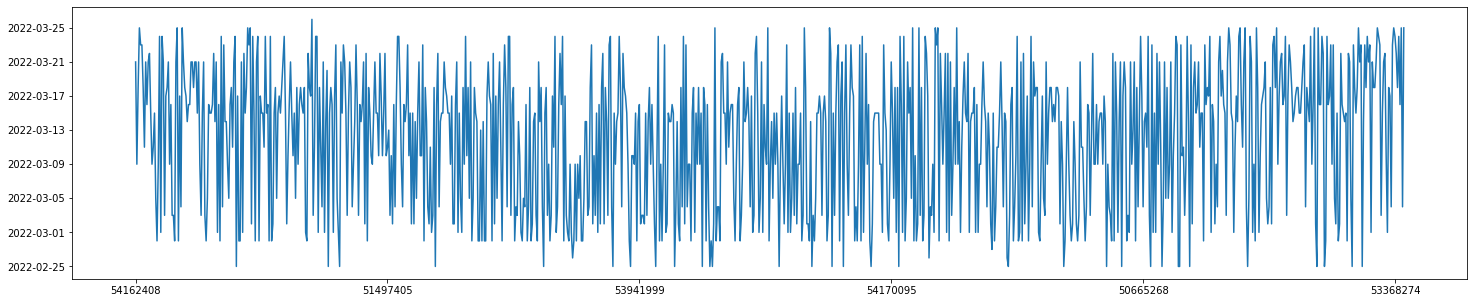

In [109]:
df_vacancy['vacdate'].plot(figsize=(25, 5))

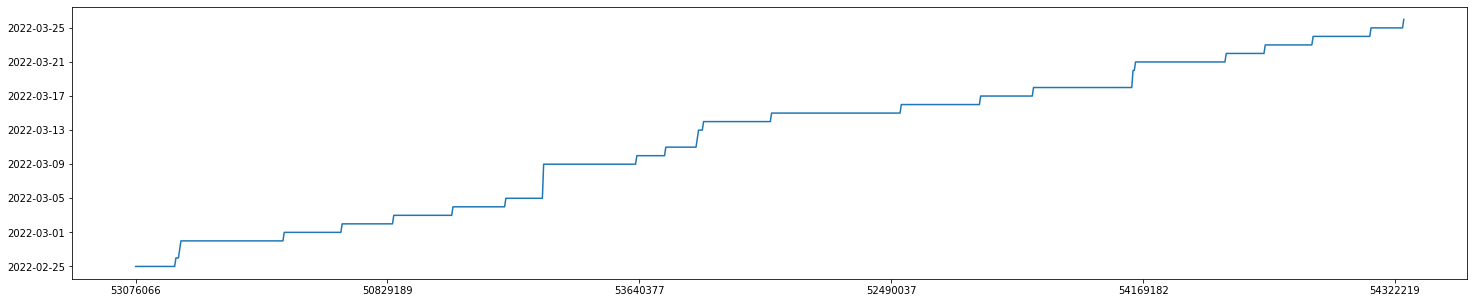

In [111]:
df_vacancy['vacdate'].sort_values().plot(figsize=(25, 5))

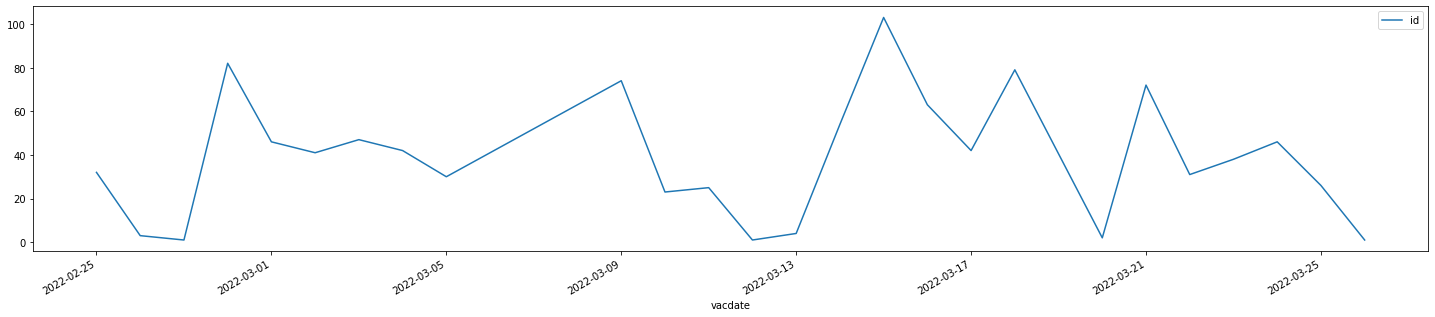

In [115]:
df_vacancy[['vacdate', 'id']].groupby(by=['vacdate']).count().plot(figsize=(25, 5))

# Переведите даты в дни недели, и определите день недели, в который больше всего публикуют вакансий

In [123]:
df_vacancy['vacdate_dayofweek'] = df_vacancy['vacdate'].dt.dayofweek
df_vacancy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,created_at,updated_at,vacid,vactitle,vacdescription,vacdate,vacstatus,vaclink,vachtml,skills,vacdate_dayofweek
54162408,54162408,2022-03-21T16:08:01+0300,None,None,"Стажёр по направлению ""Data Engineering"" от SB...","<p>Современный стек разработки, передовые техн...",2022-03-21,True,https://hh.ru/vacancy/54162408,None,"[{'name': 'Python'}, {'name': 'SQL'}, {'name':...",0
53568652,53568652,2022-03-09T13:38:12+0300,None,None,Менеджер по обслуживанию,<p>Сбер — лучший работодатель России. У нас бо...,2022-03-09,True,https://hh.ru/vacancy/53568652,None,[],2
46380141,46380141,2022-03-18T14:30:24+0300,None,None,Менеджер по работе с клиентами,<p>Сбер — лучший работодатель России. У нас бо...,2022-03-18,True,https://hh.ru/vacancy/46380141,None,"[{'name': 'Активные продажи'}, {'name': 'Поиск...",4
54324115,54324115,2022-03-25T15:08:14+0300,None,None,Junior Python разработчик,<p>Проект представляет собой систему для выгру...,2022-03-25,True,https://hh.ru/vacancy/54324115,None,"[{'name': 'Python'}, {'name': 'Docker'}, {'nam...",4
52849639,52849639,2022-03-23T19:41:59+0300,None,None,Финансовый консультант,<p>Сбер — лучший работодатель России. У нас бо...,2022-03-23,True,https://hh.ru/vacancy/52849639,None,[],2
...,...,...,...,...,...,...,...,...,...,...,...,...
47748042,47748042,2022-03-24T13:14:24+0300,None,None,Senior Android Developer,<p>Мы делаем новую систему авторизации сотрудн...,2022-03-24,True,https://hh.ru/vacancy/47748042,None,"[{'name': 'REST'}, {'name': 'Git'}, {'name': '...",3
53929493,53929493,2022-03-16T12:35:21+0300,None,None,Data Scientist (CV+NLP),<p>В дивизион &quot;Развитие внешнеэкономическ...,2022-03-16,True,https://hh.ru/vacancy/53929493,None,[],2
53867761,53867761,2022-03-25T18:20:39+0300,None,None,DBA / Администратор баз данных (PostgreSQL),<p>HR-платформа СБЕРа - собственный продукт ко...,2022-03-25,True,https://hh.ru/vacancy/53867761,None,[],4
53387287,53387287,2022-03-04T19:47:19+0300,None,None,Руководитель направления Отдела сопровождения ...,<p>В Отдел сопровождения депозитарных операций...,2022-03-04,True,https://hh.ru/vacancy/53387287,None,"[{'name': 'Депозитарий'}, {'name': 'Депозитарн...",4


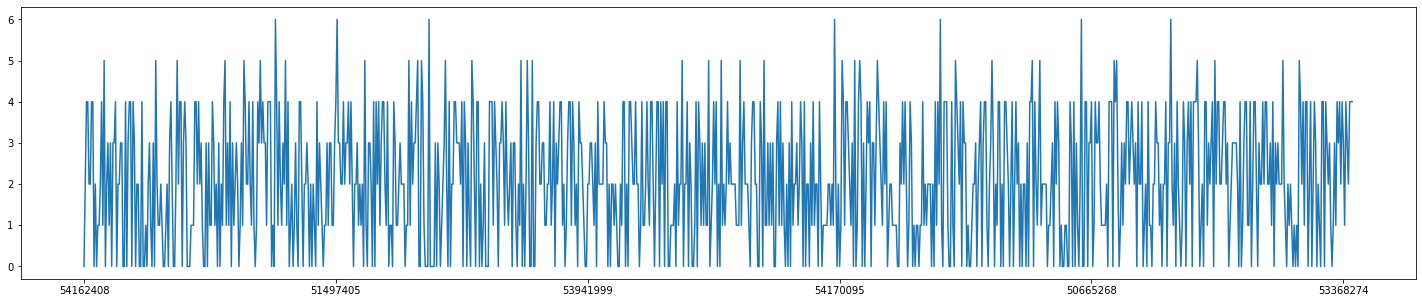

In [125]:
df_vacancy['vacdate_dayofweek'].plot(figsize=(25, 5))

In [127]:
vacdate_dayofweek_count =  df_vacancy[['vacdate_dayofweek', 'id']].groupby(by=['vacdate_dayofweek']).count()
vacdate_dayofweek_count

,id
vacdate_dayofweek,
0,208
1,180
2,216
3,158
4,204
5,35
6,7


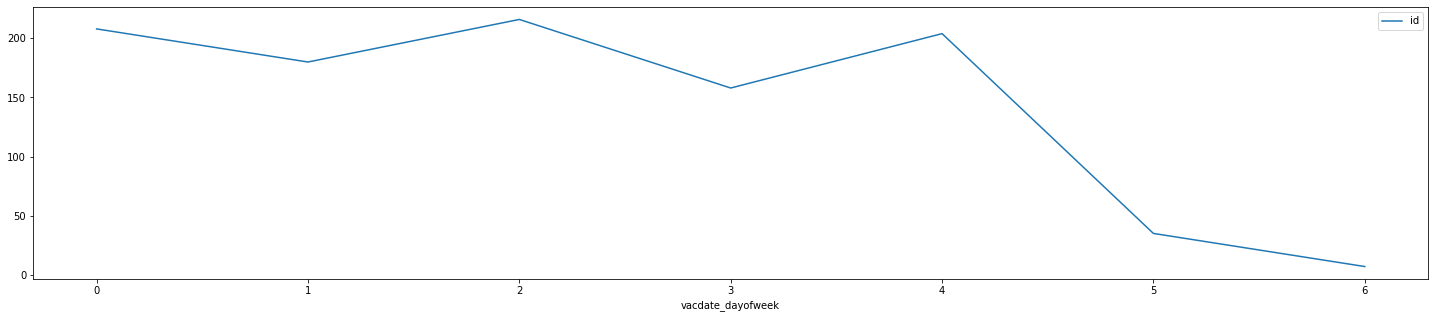

In [128]:
vacdate_dayofweek_count.plot(figsize=(25, 5))

In [132]:
vacdate_dayofweek_count[vacdate_dayofweek_count['id'] == vacdate_dayofweek_count['id'].max()]

,id
vacdate_dayofweek,
2,216


# Найдите те вакансии с использованием python, которые вам интересны

In [181]:
df_vacancy_favourites = df_vacancy[
    (
        (df_vacancy['vactitle'].str.upper().str.contains('python'.upper())) |
        (df_vacancy['vacdescription'].str.upper().str.contains('python'.upper()))
    )
    &
    (
        (df_vacancy['vactitle'].str.upper().str.contains('Data Scientist'.upper())) |
        (df_vacancy['vacdescription'].str.upper().str.contains('Data Scientist'.upper()))
    )
    ]

df_vacancy_favourites

,id,created_at,updated_at,vacid,vactitle,vacdescription,vacdate,vacstatus,vaclink,vachtml,skills,vacdate_dayofweek
53206461,53206461,2022-03-01T09:54:28+0300,None,None,Стажер Data Scientist,<p>Стажер – Data Scientist (кластер SberNBA.Bu...,2022-03-01,True,https://hh.ru/vacancy/53206461,None,"[{'name': 'Python'}, {'name': 'SQL'}]",1
53947831,53947831,2022-03-16T17:39:11+0300,None,None,Data scientist,<p>Блок &quot;Сеть продаж&quot; курирует все ф...,2022-03-16,True,https://hh.ru/vacancy/53947831,None,"[{'name': 'Python'}, {'name': 'SQL'}, {'name':...",2
51784863,51784863,2022-03-03T16:11:27+0300,None,None,Data Scientist (SberDevices),<p><strong>SberDevices </strong>- инновационно...,2022-03-03,True,https://hh.ru/vacancy/51784863,None,"[{'name': 'PyTorch'}, {'name': 'Tensorflow'}, ...",3
54153133,54153133,2022-03-21T13:37:58+0300,None,None,Data Scientist в команду Эквайринг,<p>Мы ищем Data Scientist’а в команду трайба «...,2022-03-21,True,https://hh.ru/vacancy/54153133,None,[],0
53993641,53993641,2022-03-17T14:20:20+0300,None,None,Data scientist / Data Analyst,"<p>Мы – сплоченная команда единомышленников, к...",2022-03-17,True,https://hh.ru/vacancy/53993641,None,"[{'name': 'Python'}, {'name': 'Английский язык...",3
53408077,53408077,2022-03-05T09:57:15+0300,None,None,Lead data scientist (Антифрод),<p><strong>Проект:</strong></p> <p>Вам предсто...,2022-03-05,True,https://hh.ru/vacancy/53408077,None,[],5
54289895,54289895,2022-03-24T14:59:47+0300,None,None,"Data Scientist в команду, разрабатывающую Комм...",<p>Наша команда совершенствует коммуникационну...,2022-03-24,True,https://hh.ru/vacancy/54289895,None,"[{'name': 'Big Data'}, {'name': 'SQL'}, {'name...",3
54043623,54043623,2022-03-18T13:25:53+0300,None,None,Data Scientist,"<p>Мы - новая быстрорастущая команда, создающа...",2022-03-18,True,https://hh.ru/vacancy/54043623,None,[],4
47342740,47342740,2022-02-28T11:06:45+0300,None,None,Data Scientist в области рекомендательных систем,"<p>Дорогой кандидат, мы - динамично растущая к...",2022-02-28,True,https://hh.ru/vacancy/47342740,None,"[{'name': 'DS'}, {'name': 'ML'}, {'name': 'Pyt...",0
48980070,48980070,2022-03-03T16:11:39+0300,None,None,ML Engineer/Data Scientist,<p>Набор идёт в команду <strong>Layer</strong>...,2022-03-03,True,https://hh.ru/vacancy/48980070,None,"[{'name': 'Git'}, {'name': 'Python'}, {'name':...",3


# Определите по полю skills какие навыки больше всего востребованы для этих вакансий, и

In [182]:
df_vacancy_favourites['skills'].dtype

dtype('O')

In [185]:
df_vacancy_favourites[['skills']]

,skills
53206461,"[{'name': 'Python'}, {'name': 'SQL'}]"
53947831,"[{'name': 'Python'}, {'name': 'SQL'}, {'name':..."
51784863,"[{'name': 'PyTorch'}, {'name': 'Tensorflow'}, ..."
54153133,[]
53993641,"[{'name': 'Python'}, {'name': 'Английский язык..."
53408077,[]
54289895,"[{'name': 'Big Data'}, {'name': 'SQL'}, {'name..."
54043623,[]
47342740,"[{'name': 'DS'}, {'name': 'ML'}, {'name': 'Pyt..."
48980070,"[{'name': 'Git'}, {'name': 'Python'}, {'name':..."


In [186]:
df_vacancy_favourites['skills'].apply(lambda x: (type(x), len(x)))

53206461     (<class 'list'>, 2)
53947831     (<class 'list'>, 4)
51784863     (<class 'list'>, 5)
54153133     (<class 'list'>, 0)
53993641     (<class 'list'>, 5)
53408077     (<class 'list'>, 0)
54289895    (<class 'list'>, 13)
54043623     (<class 'list'>, 0)
47342740     (<class 'list'>, 3)
48980070     (<class 'list'>, 5)
53081133     (<class 'list'>, 0)
53867020     (<class 'list'>, 0)
53884029     (<class 'list'>, 0)
54040094     (<class 'list'>, 8)
53828168     (<class 'list'>, 5)
53674302     (<class 'list'>, 0)
53269426     (<class 'list'>, 5)
54170111     (<class 'list'>, 0)
53947371     (<class 'list'>, 5)
51882397     (<class 'list'>, 0)
53861421     (<class 'list'>, 0)
53866463     (<class 'list'>, 0)
53859295     (<class 'list'>, 0)
53929493     (<class 'list'>, 0)
Name: skills, dtype: object

In [187]:
df_vacancy_favourites['skills_raw'] = df_vacancy_favourites['skills']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [188]:
df_vacancy_favourites_skills = df_vacancy_favourites.explode('skills')
df_vacancy_favourites_skills

,id,created_at,updated_at,vacid,vactitle,vacdescription,vacdate,vacstatus,vaclink,vachtml,skills,vacdate_dayofweek,skills_raw
53206461,53206461,2022-03-01T09:54:28+0300,None,None,Стажер Data Scientist,<p>Стажер – Data Scientist (кластер SberNBA.Bu...,2022-03-01,True,https://hh.ru/vacancy/53206461,None,{'name': 'Python'},1,"[{'name': 'Python'}, {'name': 'SQL'}]"
53206461,53206461,2022-03-01T09:54:28+0300,None,None,Стажер Data Scientist,<p>Стажер – Data Scientist (кластер SberNBA.Bu...,2022-03-01,True,https://hh.ru/vacancy/53206461,None,{'name': 'SQL'},1,"[{'name': 'Python'}, {'name': 'SQL'}]"
53947831,53947831,2022-03-16T17:39:11+0300,None,None,Data scientist,<p>Блок &quot;Сеть продаж&quot; курирует все ф...,2022-03-16,True,https://hh.ru/vacancy/53947831,None,{'name': 'Python'},2,"[{'name': 'Python'}, {'name': 'SQL'}, {'name':..."
53947831,53947831,2022-03-16T17:39:11+0300,None,None,Data scientist,<p>Блок &quot;Сеть продаж&quot; курирует все ф...,2022-03-16,True,https://hh.ru/vacancy/53947831,None,{'name': 'SQL'},2,"[{'name': 'Python'}, {'name': 'SQL'}, {'name':..."
53947831,53947831,2022-03-16T17:39:11+0300,None,None,Data scientist,<p>Блок &quot;Сеть продаж&quot; курирует все ф...,2022-03-16,True,https://hh.ru/vacancy/53947831,None,{'name': 'MS PowerPoint'},2,"[{'name': 'Python'}, {'name': 'SQL'}, {'name':..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51882397,51882397,2022-03-23T11:35:56+0300,None,None,Scala разработчик,<p>SberData – департамент по управлению данным...,2022-03-23,True,https://hh.ru/vacancy/51882397,None,NaN,2,[]
53861421,53861421,2022-03-15T10:09:32+0300,None,None,Data - инженер,<p>Мы создаем платформу данных для розничного ...,2022-03-15,True,https://hh.ru/vacancy/53861421,None,NaN,1,[]
53866463,53866463,2022-03-15T11:13:05+0300,None,None,Senior/Lead Data Scientist,"<p>Предстоит работа в команде, где будут Data ...",2022-03-15,True,https://hh.ru/vacancy/53866463,None,NaN,1,[]
53859295,53859295,2022-03-15T09:35:06+0300,None,None,Senior Python разработчик (Цифровой кредитный ...,<p>В дивизион Цифровой кредитный мониторинг Ко...,2022-03-15,True,https://hh.ru/vacancy/53859295,None,NaN,1,[]


In [189]:
df_vacancy_favourites_skills['skills'].dtype

dtype('O')

In [190]:
df_vacancy_favourites_skills[df_vacancy_favourites_skills['skills'].isna()]['skills'] = None
df_vacancy_favourites_skills['skills'].fillna({})

df_vacancy_favourites_skills

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,created_at,updated_at,vacid,vactitle,vacdescription,vacdate,vacstatus,vaclink,vachtml,skills,vacdate_dayofweek,skills_raw
53206461,53206461,2022-03-01T09:54:28+0300,None,None,Стажер Data Scientist,<p>Стажер – Data Scientist (кластер SberNBA.Bu...,2022-03-01,True,https://hh.ru/vacancy/53206461,None,{'name': 'Python'},1,"[{'name': 'Python'}, {'name': 'SQL'}]"
53206461,53206461,2022-03-01T09:54:28+0300,None,None,Стажер Data Scientist,<p>Стажер – Data Scientist (кластер SberNBA.Bu...,2022-03-01,True,https://hh.ru/vacancy/53206461,None,{'name': 'SQL'},1,"[{'name': 'Python'}, {'name': 'SQL'}]"
53947831,53947831,2022-03-16T17:39:11+0300,None,None,Data scientist,<p>Блок &quot;Сеть продаж&quot; курирует все ф...,2022-03-16,True,https://hh.ru/vacancy/53947831,None,{'name': 'Python'},2,"[{'name': 'Python'}, {'name': 'SQL'}, {'name':..."
53947831,53947831,2022-03-16T17:39:11+0300,None,None,Data scientist,<p>Блок &quot;Сеть продаж&quot; курирует все ф...,2022-03-16,True,https://hh.ru/vacancy/53947831,None,{'name': 'SQL'},2,"[{'name': 'Python'}, {'name': 'SQL'}, {'name':..."
53947831,53947831,2022-03-16T17:39:11+0300,None,None,Data scientist,<p>Блок &quot;Сеть продаж&quot; курирует все ф...,2022-03-16,True,https://hh.ru/vacancy/53947831,None,{'name': 'MS PowerPoint'},2,"[{'name': 'Python'}, {'name': 'SQL'}, {'name':..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51882397,51882397,2022-03-23T11:35:56+0300,None,None,Scala разработчик,<p>SberData – департамент по управлению данным...,2022-03-23,True,https://hh.ru/vacancy/51882397,None,NaN,2,[]
53861421,53861421,2022-03-15T10:09:32+0300,None,None,Data - инженер,<p>Мы создаем платформу данных для розничного ...,2022-03-15,True,https://hh.ru/vacancy/53861421,None,NaN,1,[]
53866463,53866463,2022-03-15T11:13:05+0300,None,None,Senior/Lead Data Scientist,"<p>Предстоит работа в команде, где будут Data ...",2022-03-15,True,https://hh.ru/vacancy/53866463,None,NaN,1,[]
53859295,53859295,2022-03-15T09:35:06+0300,None,None,Senior Python разработчик (Цифровой кредитный ...,<p>В дивизион Цифровой кредитный мониторинг Ко...,2022-03-15,True,https://hh.ru/vacancy/53859295,None,NaN,1,[]


In [191]:
df_vacancy_favourites_skills['skills_name'] = df_vacancy_favourites_skills['skills'].apply(lambda x: x['name'] if isinstance(x, dict) else None)
df_vacancy_favourites_skills

,id,created_at,updated_at,vacid,vactitle,vacdescription,vacdate,vacstatus,vaclink,vachtml,skills,vacdate_dayofweek,skills_raw,skills_name
53206461,53206461,2022-03-01T09:54:28+0300,None,None,Стажер Data Scientist,<p>Стажер – Data Scientist (кластер SberNBA.Bu...,2022-03-01,True,https://hh.ru/vacancy/53206461,None,{'name': 'Python'},1,"[{'name': 'Python'}, {'name': 'SQL'}]",Python
53206461,53206461,2022-03-01T09:54:28+0300,None,None,Стажер Data Scientist,<p>Стажер – Data Scientist (кластер SberNBA.Bu...,2022-03-01,True,https://hh.ru/vacancy/53206461,None,{'name': 'SQL'},1,"[{'name': 'Python'}, {'name': 'SQL'}]",SQL
53947831,53947831,2022-03-16T17:39:11+0300,None,None,Data scientist,<p>Блок &quot;Сеть продаж&quot; курирует все ф...,2022-03-16,True,https://hh.ru/vacancy/53947831,None,{'name': 'Python'},2,"[{'name': 'Python'}, {'name': 'SQL'}, {'name':...",Python
53947831,53947831,2022-03-16T17:39:11+0300,None,None,Data scientist,<p>Блок &quot;Сеть продаж&quot; курирует все ф...,2022-03-16,True,https://hh.ru/vacancy/53947831,None,{'name': 'SQL'},2,"[{'name': 'Python'}, {'name': 'SQL'}, {'name':...",SQL
53947831,53947831,2022-03-16T17:39:11+0300,None,None,Data scientist,<p>Блок &quot;Сеть продаж&quot; курирует все ф...,2022-03-16,True,https://hh.ru/vacancy/53947831,None,{'name': 'MS PowerPoint'},2,"[{'name': 'Python'}, {'name': 'SQL'}, {'name':...",MS PowerPoint
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51882397,51882397,2022-03-23T11:35:56+0300,None,None,Scala разработчик,<p>SberData – департамент по управлению данным...,2022-03-23,True,https://hh.ru/vacancy/51882397,None,NaN,2,[],None
53861421,53861421,2022-03-15T10:09:32+0300,None,None,Data - инженер,<p>Мы создаем платформу данных для розничного ...,2022-03-15,True,https://hh.ru/vacancy/53861421,None,NaN,1,[],None
53866463,53866463,2022-03-15T11:13:05+0300,None,None,Senior/Lead Data Scientist,"<p>Предстоит работа в команде, где будут Data ...",2022-03-15,True,https://hh.ru/vacancy/53866463,None,NaN,1,[],None
53859295,53859295,2022-03-15T09:35:06+0300,None,None,Senior Python разработчик (Цифровой кредитный ...,<p>В дивизион Цифровой кредитный мониторинг Ко...,2022-03-15,True,https://hh.ru/vacancy/53859295,None,NaN,1,[],None


In [196]:
df_vacancy_favourites_skills_value_counts = df_vacancy_favourites_skills['skills_name'].value_counts()
df_vacancy_favourites_skills_value_counts

Python                       11
SQL                           7
Английский язык               4
Java                          3
Linux                         3
Hadoop                        2
Deep Learning                 2
NLP                           2
Machine Learning              2
ML                            1
Git                           1
Bash                          1
REST                          1
BPMN                          1
UML                           1
Коммуникационная политика     1
Atlassian Jira                1
SOAP                          1
Spark                         1
DS                            1
Розничный бизнес              1
Разработка моделей данных     1
Большие данные                1
Исследование данных           1
Розничный банк                1
Data Scientist                1
Анализ данных                 1
Big Data                      1
Numpy                         1
Tensorflow                    1
PyTorch                       1
MS Power

# Постройте график наиболее востребованных вакансий

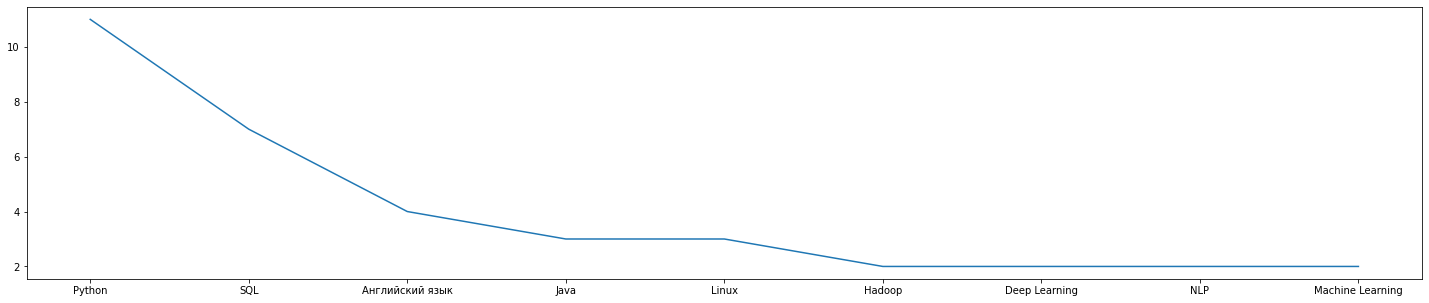

In [199]:
df_vacancy_favourites_skills_value_counts[df_vacancy_favourites_skills_value_counts > 1].plot(figsize=(25, 5))
